# Coding up a Fourier transform - EASY(IER) VERSION

Let's consider a stretch of data 16 seconds long, sampled 16 times a second (so 256 samples, or `len(data_time_domain) = 256`). This data is given by a sinusoid. Using the equations above, write a function to compute the Fourier transform of this data. Then inverse Fourier transform the data and verify that you get the original time series. Here we've written the relevant plotting codes, but we have not written the Fourier transform and inverse Fourier transform. That's your task!



In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.signal

Text(0, 0.5, 'Amplitude')

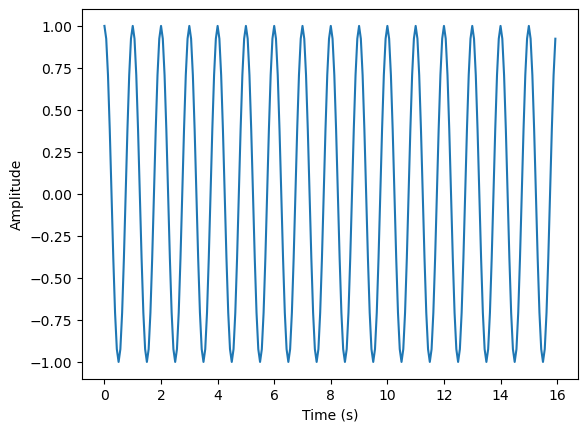

In [2]:
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 1. / 16.
times = np.arange(data_length) * sample_rate
data_time_domain = np.cos(times * omega)
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Okay, let's break this down into stages. We need to compute

$X_k = \sum_{n=0}^{N-1} x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

but this has a bunch of stages, and a summation, and needs to produce a vector of outputs. Let's break this down.

## PART 1

The bulk of this will be computing the bit inside the sum:

$x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

This contains 4 things that will vary: $k$, $n$, $N$ and $x_n$. So first write a function that takes these 4 inputs and computes

$x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$


In [3]:
def fourier_transform_inner_bit(x_n, k, n, N):

    return x_n * (np.cos(2*np.pi * k * n / N) - 1j * np.sin(2*np.pi * k * n / N))


In [4]:
# Run this to validate the function above
print("Your code gives", fourier_transform_inner_bit(2, 3, 1, 10), "it should say (-0.6180339887498947-1.9021130325903073j)")
print("Your code gives", fourier_transform_inner_bit(4, 5, 2, 12), "it should say (2.0000000000000004+3.4641016151377544j)")


Your code gives (-0.6180339887498947-1.9021130325903073j) it should say (-0.6180339887498947-1.9021130325903073j)
Your code gives (2.0000000000000004+3.4641016151377544j) it should say (2.0000000000000004+3.4641016151377544j)


## PART 2 

Okay we wrote a function to compute that inner part. Let's call this $F_1(x_n, k, n, N)$ where

$F_1(x_n, k, n, N) = x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

then our original equation

$X_k = \sum_{n=0}^{N-1} x_n \left[ \cos({2 \pi k n / N}) - i \sin({2 \pi k n / N}) \right]$

becomes

$X_k = \sum_{n=0}^{N-1} F_1(x_n, k, n, N)$

so now let's compute


$\sum_{n=0}^{N-1} F_1(x_n, k, n, N)$

To do this write a function, which will take $x$, $k$ and $N$ as inputs and should return the sum.

**NOTE** $x$ is now a numpy array! When calling $F_1$ we should use $x_n$, which is the nth element of $x$ or `x[n]`


In [6]:
def fourier_transform_first_sum(x, k, N):
    X_k = 0
    for n in range(N):
        X_k += fourier_transform_inner_bit(x[n], k, n, N)
    return X_k

In [7]:
# Run this to verify your codde
print("Your code gives", fourier_transform_first_sum(np.arange(10), 3, 10), "it should say (-5.000000000000003+3.632712640026803j)")
print("Your code gives", fourier_transform_first_sum(np.logspace(1,1.2,12), 5, 12), "it should say (-3.1900677019085393+0.8739794353193151j)")


Your code gives (-5.000000000000003+3.632712640026803j) it should say (-5.000000000000003+3.632712640026803j)
Your code gives (-3.1900677019085393+0.8739794353193151j) it should say (-3.1900677019085393+0.8739794353193151j)


## PART 3

Now we have a function $F_2(x, k, N)$ so we can write

$X_k = F_2(x, k, N)$

However, we want to compute $X_k$ for all possible values of k such that $X$ is also a numpy array of complex numbers). We'll do this in the following steps:

* Our function should take as input $x$; the data in the time domain (`data_time_domain` in the example above). This is a numpy array.
* Our function should output $X$ the Fourier transform, which is an array of complex numbers. Considering the stuff written above, we'll make $X$ the same length as $x$ (which will result in some symmetry in the output, as we'll explore later).
* Define N to be the length of $x$
* Create an empty array of complex numbers $X$, which should be the same length as $x$.
* Loop over k (from 0 to N-1 (inclusive)). For each value of k set `X[k] = F_2(x, k, N)`
* Return output




In [8]:
def compute_fourier_transform(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        X[k] = fourier_transform_first_sum(x, k, N)

    return X


In [14]:
# Run this to verify your code

your_output_1 = compute_fourier_transform(np.arange(10))
stock_output_1 = np.array([45.+0.00000000e+00j, -5.+1.53884177e+01j, -5.+6.88190960e+00j,
                           -5.+3.63271264e+00j, -5.+1.62459848e+00j, -5.-5.51091060e-15j,
                           -5.-1.62459848e+00j, -5.-3.63271264e+00j, -5.-6.88190960e+00j,
                           -5.-1.53884177e+01j])
# YOU NEED TO CHECK THAT stock_output_1 and your_output_1 are the same!!!
print(your_output_1)

if all(np.isclose(stock_output_1, your_output_1)):
    print("Output 1 is correct!")


your_output_2 = compute_fourier_transform(np.logspace(1,1.2,12))
print(your_output_2)
stock_output_2 = np.array([152.65360821+0.00000000e+00j, -2.2498741 +1.20995246e+01j,
                           -2.99043154+5.64225487e+00j, -3.12673016+3.26041003e+00j,
                           -3.17221609+1.88294825e+00j, -3.1900677 +8.73979435e-01j,
                           -3.19496902+7.67154354e-14j, -3.1900677 -8.73979435e-01j,
                           -3.17221609-1.88294825e+00j, -3.12673016-3.26041003e+00j,
                           -2.99043154-5.64225487e+00j, -2.2498741 -1.20995246e+01j])
# YOU NEED TO CHECK THAT stock_output_2 and your_output_2 are the same!!!

if all(np.isclose(stock_output_2, your_output_2)):
    print("Output 2 is correct!")

[45.+0.00000000e+00j -5.+1.53884177e+01j -5.+6.88190960e+00j
 -5.+3.63271264e+00j -5.+1.62459848e+00j -5.-5.51091060e-15j
 -5.-1.62459848e+00j -5.-3.63271264e+00j -5.-6.88190960e+00j
 -5.-1.53884177e+01j]
Output 1 is correct!
[152.65360821+0.00000000e+00j  -2.2498741 +1.20995246e+01j
  -2.99043154+5.64225487e+00j  -3.12673016+3.26041003e+00j
  -3.17221609+1.88294825e+00j  -3.1900677 +8.73979435e-01j
  -3.19496902+7.67154354e-14j  -3.1900677 -8.73979435e-01j
  -3.17221609-1.88294825e+00j  -3.12673016-3.26041003e+00j
  -2.99043154-5.64225487e+00j  -2.2498741 -1.20995246e+01j]
Output 2 is correct!


## PART 4

Now we need to define the *inverse* Fourier transform. Compare the equations. This is basically the same as the Fourier transform. So repeat parts 1 - 3, with the necessary small modification, and write an inverse Fourier transform

In [15]:
def inv_fourier_transform_inner_bit(X_k, k, n, N):
    return X_k * (np.cos(2*np.pi * k * n / N) + 1j * np.sin(2*np.pi * k * n / N))


def inv_fourier_transform_first_sum(X, n, N):
    x_n = 0
    for k in range(N):
        x_n += inv_fourier_transform_inner_bit(X[k], k, n, N)
    return x_n


def compute_inverse_fourier_transform(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        x[n] = inv_fourier_transform_first_sum(X, n, N) / N

    return x


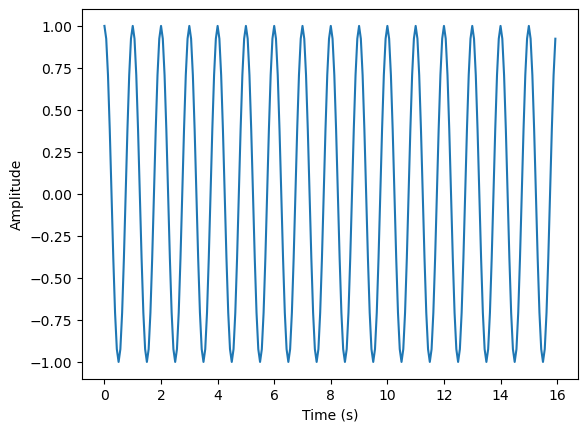

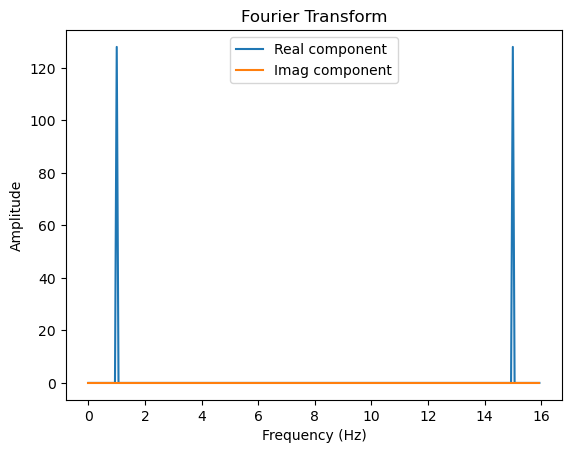

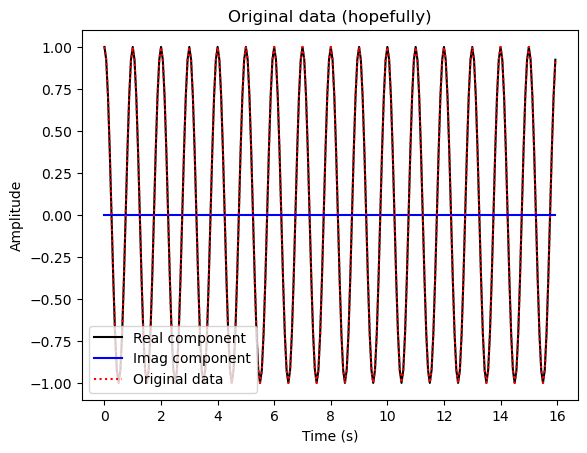

In [16]:
# If your code above is working, the following should plot the data, it's Fourier transform, 
# and then the inverse of that (which should be identical to the original data)

# Create data
omega = 1. * (2*np.pi)
data_length = 256
sample_rate = 1. / 16.
times = np.arange(data_length) * sample_rate
data_time_domain = np.cos(times * omega)
plt.plot(times,data_time_domain)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Here's how you would plot the Fourier transformed data.
plt.figure()
frequencies = np.arange(256) * (1./(data_length*sample_rate))
data_frequency_domain = compute_fourier_transform(data_time_domain)
plt.plot(frequencies, data_frequency_domain.real)
plt.plot(frequencies, data_frequency_domain.imag) # This is complex, so need two lines
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component'])

# Make sure that the inverted data is equal to the original data!
plt.figure()
data_time_domain_inverted = compute_inverse_fourier_transform(data_frequency_domain)
plt.plot(times, data_time_domain_inverted.real, 'k-')
plt.plot(times, data_time_domain_inverted.imag, 'b-') # This is complex, so need two lines
plt.plot(times, data_time_domain, 'r:')
plt.title('Original data (hopefully)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(['Real component','Imag component', 'Original data'])
